In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,Normalizer,MaxAbsScaler
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from matplotlib.legend_handler import HandlerLine2D

In [29]:
df = pd.read_excel("Classification_data.xlsx", sheet_name = "Overall")
#Cleaning the data
print("Initial shape of the dataframe: " ,df.shape)
col_names = df.columns
#Removed the "?" values
df.replace("?",np.NaN, inplace = True)
df.replace("-", np.NaN, inplace = True)
df1 = df.interpolate()
df1.dropna()
df2 = df.dropna()
print("Current shape of the dataframe1: ", df1.shape)
print("Current shape of the dataframe2: ", df2.shape)
print(df1.isnull().values.any())
df2.isnull().values.any()


Initial shape of the dataframe:  (43405, 65)
Current shape of the dataframe1:  (43405, 65)
Current shape of the dataframe2:  (19617, 65)
False


False

In [6]:
df1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65
0,0.088238,0.55472,0.01134,1.02050,-66.5200,0.342040,0.109490,0.577520,1.08810,0.320360,...,0.080955,0.275430,0.919050,0.002024,7.2711,4.73430,142.7600,2.55680,3.25970,0.0
1,-0.006202,0.48465,0.23298,1.59980,6.1825,0.000000,-0.006202,1.063400,1.27570,0.515350,...,-0.028591,-0.012035,1.004700,0.152220,6.0911,3.27490,111.1400,3.28410,3.37000,0.0
2,0.130240,0.22142,0.57751,3.60820,120.0400,0.187640,0.162120,3.059000,1.14150,0.677310,...,0.123960,0.192290,0.876040,0.000000,8.7934,2.98700,71.5310,5.10270,5.61880,0.0
3,-0.089951,0.88700,0.26927,1.52220,-55.9920,-0.073957,-0.089951,0.127400,1.27540,0.113000,...,0.418840,-0.796020,0.590740,2.878700,7.6524,3.33020,147.5600,2.47350,5.92990,0.0
4,0.048179,0.55041,0.10765,1.24370,-22.9590,0.000000,0.059280,0.816820,1.51500,0.449590,...,0.240400,0.107160,0.770480,0.139380,10.1180,4.09500,106.4300,3.42940,3.36220,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.988090,0.274140,73.5050,79.23700,31.2680,11.67300,5.14890,1.0
43401,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,0.010083,0.026342,0.989915,0.137070,41.9875,42.65645,41.1435,9.41360,33.57495,1.0
43402,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.991740,0.000000,10.4700,6.07590,51.0190,7.15420,62.00100,1.0
43403,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,0.011981,0.146513,0.983085,0.589600,12.7530,5.12500,79.8295,5.25705,48.55950,1.0


In [7]:
col_numeric = df1._get_numeric_data().columns
col_numeric



Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'X65'],
      dtype='object')

Text(0.5, 1.0, 'Status of Imbalance in the dataset')

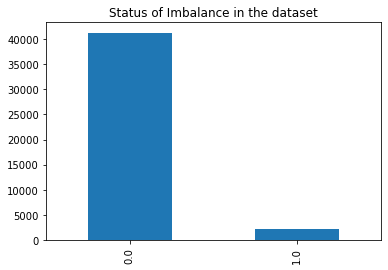

In [8]:
#Handling imbalance datasets
df1["X65"].value_counts().plot.bar()
plt.title("Status of Imbalance in the dataset")

In [ ]:
#This shows high imbalance between the data observation's output. In this scenario, our model gives more weightage to minority 
#minority model.

# Feature Extraction

In [9]:
X = np.array(df1.loc[:,df1.columns != "X65"])
Y = np.array(df1.loc[:,df1.columns == "X65"]).reshape(-1,1)

X_train_data = df1.loc[:,df1.columns != "X65"]
X_train_data.shape

(43405, 64)

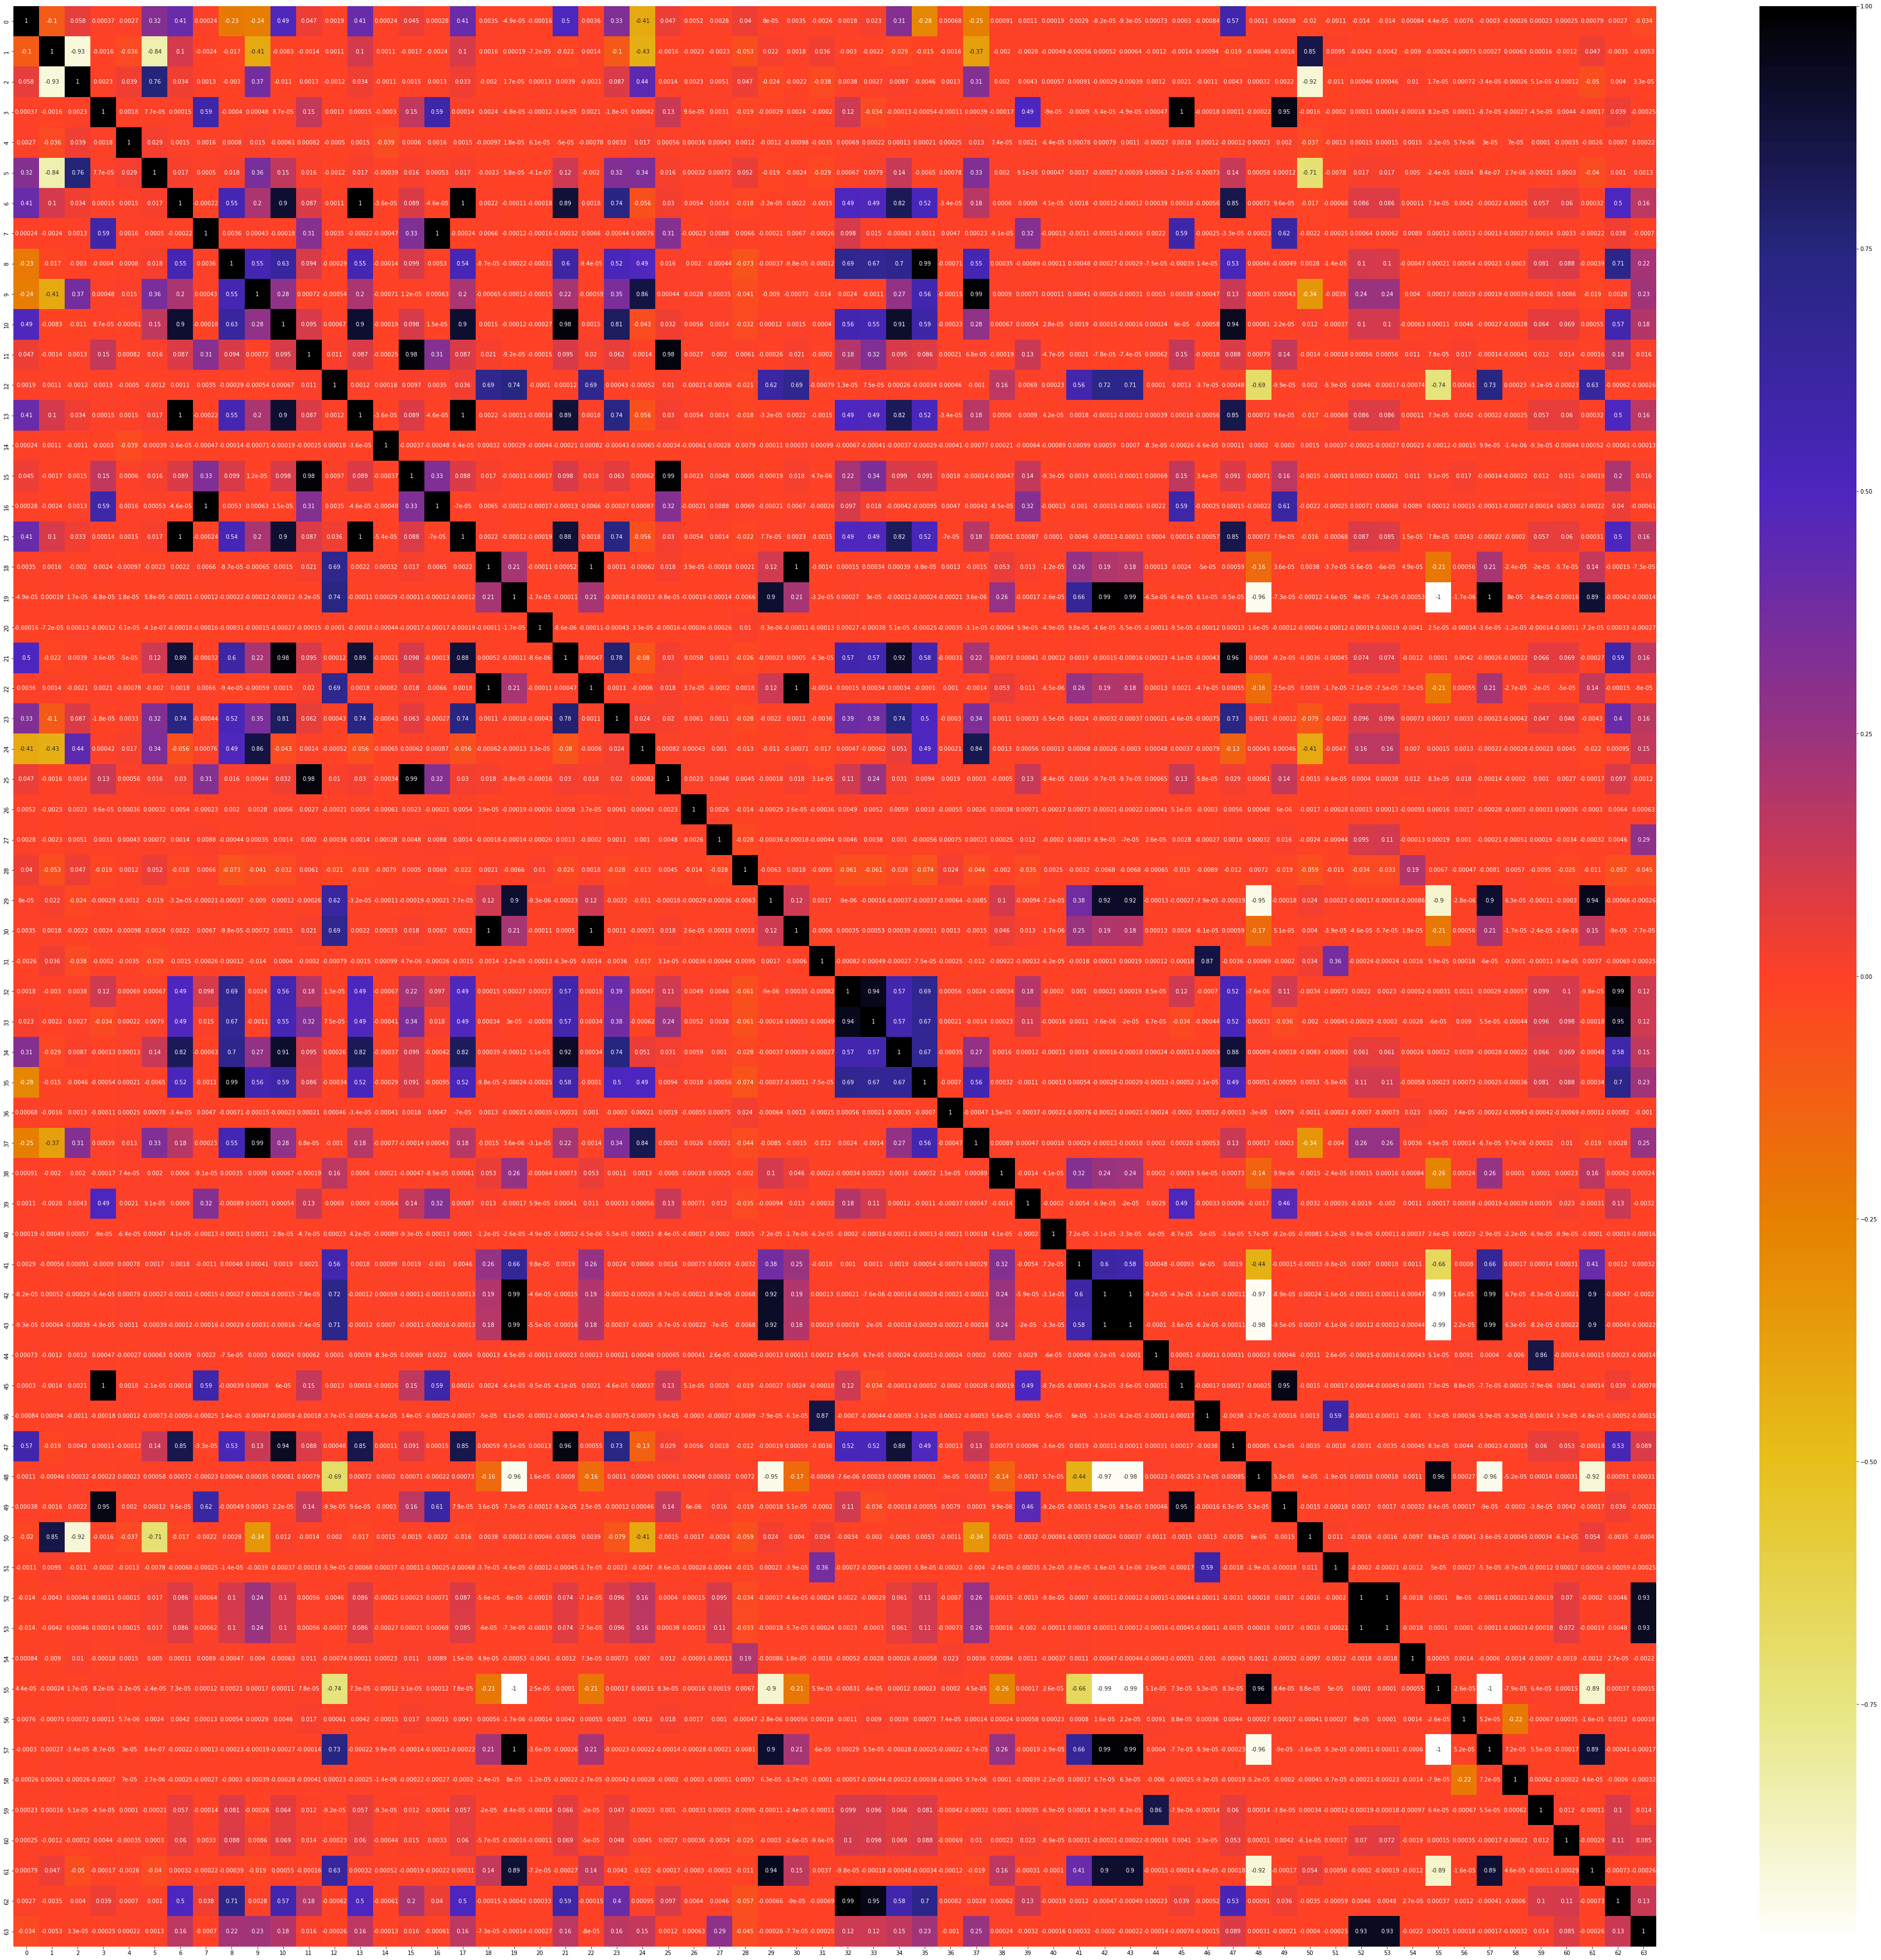

In [10]:
cor = pd.DataFrame(X).corr()
plt.figure(figsize = (66,64))
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [13]:
def correlation(dataset, threshold):
    col_correlated = set()
    corr_matrix = dataset.corr()
    for i in range(1,len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname= corr_matrix.columns[i]
                col_correlated.add(colname)
    return col_correlated            
print("Number of highly_correlated variables are: ",len(correlation(pd.DataFrame(X), 0.9)))                
highly_correlated_column_idx = (correlation(pd.DataFrame(X), 0.9))  

Number of highly_correlated variables are:  28


In [16]:
newer_X = X_train_data.drop(X_train_data.columns[list(highly_correlated_column_idx)], axis = 1)
newer_X.shape

(43405, 36)

In [32]:
#test_train_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1, shuffle= True)

In [34]:
model = LogisticRegression(solver = "sag", max_iter = 2000)

# fit the model
model.fit(X_train, Y_train.ravel())

# prediction for training dataset
train_pred = model.predict(X_train)

# prediction for testing dataset
test_pred = model.predict(X_test)

C:\Users\ljakka2\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [35]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, Y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, Y_test))

Accuracy score for Training Dataset =  0.9521080520677341
Accuracy score for Testing Dataset =  0.9509273125215989


In [36]:
print("Confusion matrix_trainingdata_without_SMOTE")
pd.crosstab(Y_train.ravel(),train_pred, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

Confusion matrix_trainingdata_without_SMOTE


Predicted,0.0,1.0,All
Actual,,,
0.0,33050,6,33056
1.0,1657,11,1668
All,34707,17,34724


In [39]:
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_train,train_pred)
false_positive_rate_tst, true_positive_rate_tst, threshold_tst = roc_curve(Y_test, test_pred)
auc_train = auc(false_positive_rate, true_positive_rate)
auc_test = auc(false_positive_rate_tst, true_positive_rate_tst)
print("AUC value of training set using Logistic Regression " + str(auc_train) )
print("AUC value of test set using Logistic Regression " + str(auc_test) )

AUC value of training set using Logistic Regression 0.5032066070280271
AUC value of test set using Logistic Regression 0.49981835795592156


# Logistic Regression after removing Multicollinearity

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(newer_X,Y, test_size = 0.2, random_state = 1, shuffle= True)

In [45]:
model = LogisticRegression(solver = "sag", max_iter = 1000)

# fit the model
model.fit(X_train, Y_train.ravel())

# prediction for training dataset
train_pred = model.predict(X_train)

# prediction for testing dataset
test_pred = model.predict(X_test)

C:\Users\ljakka2\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [46]:
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_train,train_pred)
false_positive_rate_tst, true_positive_rate_tst, threshold_tst = roc_curve(Y_test, test_pred)
auc_train = auc(false_positive_rate, true_positive_rate)
auc_test = auc(false_positive_rate_tst, true_positive_rate_tst)
print("AUC value of training set using Logistic Regression " + str(auc_train) )
print("AUC value of test set using Logistic Regression " + str(auc_test) )

AUC value of training set using Logistic Regression 0.6010391348102544
AUC value of test set using Logistic Regression 0.6104616942837006



# Using SMOTE technique to eliminate Imbalance

(66112, 36)

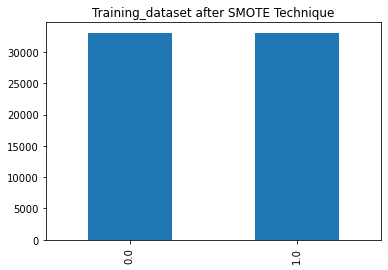

In [47]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_new,Y_train_new = sm.fit_resample(X_train,Y_train.ravel())
pd.Series(Y_train_new).value_counts().plot.bar()
plt.title("Training_dataset after SMOTE Technique")
X_train_new.shape

In [48]:
#Fitting the new_model
model.fit(X_train_new, Y_train_new)
new_train_pred = model.predict(X_train_new)
new_test_pred = model.predict(X_test)

C:\Users\ljakka2\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [49]:
print("Confusion_matrix for the SMOTE_modeled dataset")
pd.crosstab(Y_train_new.ravel(),new_train_pred, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

Confusion_matrix for the SMOTE_modeled dataset


Predicted,0.0,1.0,All
Actual,,,
0.0,25961,7095,33056
1.0,19218,13838,33056
All,45179,20933,66112


In [50]:
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_train_new,new_train_pred)
false_positive_rate_tst, true_positive_rate_tst, threshold_tst = roc_curve(Y_test, new_test_pred)
auc_train = auc(false_positive_rate, true_positive_rate)
auc_test = auc(false_positive_rate_tst, true_positive_rate_tst)
print("AUC value of training set using SMOTE technique on Logistic Regression " + str(auc_train) )
print("AUC value of test set using SMOTE technique on Logistic Regression " + str(auc_test) )

AUC value of training set using SMOTE technique on Logistic Regression 0.6019935866408519
AUC value of test set using SMOTE technique on Logistic Regression 0.6214190466211718


# KNN_Method

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_new,Y_train_new, test_size = 0.2, random_state = 41)
knn= KNeighborsClassifier().fit(X_train, Y_train)

parameters = {'scaler': [StandardScaler()],
    'classifier__n_neighbors': [(2*i)+1 for i in range(5)],
}

pipe = Pipeline([
('scaler', StandardScaler()),
('classifier', KNeighborsClassifier())
])

grid = GridSearchCV(pipe, parameters, cv=5).fit(X_train, Y_train)

In [52]:
grid.best_params_

{'classifier__n_neighbors': 1, 'scaler': StandardScaler()}

In [53]:
#Fitting the KNN_Model
pipe.fit(X_train,Y_train)
pipe.score(X_test,Y_test)

new_train_pred_knn = pipe.predict(X_train)
new_test_pred_knn = pipe.predict(X_test)
print(X_test.shape)
#roc_test_pred_knn = 
print("Confusion matrix considering the SMOTE dataset with KNN_test_data")
pd.crosstab(Y_test.ravel(),new_test_pred_knn, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

(13223, 36)
Confusion matrix considering the SMOTE dataset with KNN_test_data


Predicted,0.0,1.0,All
Actual,,,
0.0,4809,1812,6621
1.0,524,6078,6602
All,5333,7890,13223


In [54]:
#Finding Area under curve values using KNN model
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_train,new_train_pred_knn)
false_positive_rate_tst, true_positive_rate_tst, threshold_tst = roc_curve(Y_test, new_test_pred_knn)
auc_train = auc(false_positive_rate, true_positive_rate)
auc_test = auc(false_positive_rate_tst, true_positive_rate_tst)
print("AUC value of training set using SMOTE technique on KNN " + str(auc_train) )
print("AUC value of test set using SMOTE technique on KNN " + str(auc_test) )

AUC value of training set using SMOTE technique on KNN 0.8814032270512243
AUC value of test set using SMOTE technique on KNN 0.8234777202937363


# Model: XGBoost Classifier

In [63]:
#Tuning learning_rate
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.75,0.9]
train_auc, test_auc = [],[]
for i in learning_rate:
    model_xB = GradientBoostingClassifier(learning_rate = i, loss = "log_loss")
    model_xB.fit(X_train,Y_train)
    pred_train = model_xB.predict(X_train)
    pred_test = model_xB.predict(X_test)
    false_positive_rate, true_positive_rate, threshold = roc_curve(Y_train,pred_train)
    false_positive_rate_tst, true_positive_rate_tst, threshold_tst = roc_curve(Y_test, pred_test)
    auc_train = auc(false_positive_rate, true_positive_rate)
    auc_test = auc(false_positive_rate_tst, true_positive_rate_tst)
    train_auc.append(auc_train)
    test_auc.append(auc_test)
    

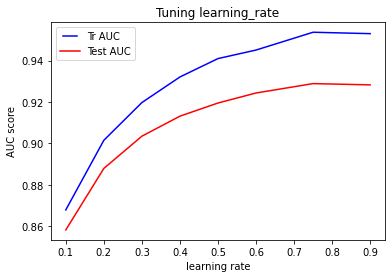

In [64]:
line1, = plt.plot(learning_rate, train_auc, "b", label="Tr AUC")
line2, = plt.plot(learning_rate, test_auc, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title("Tuning learning_rate")
plt.ylabel("AUC score")
plt.xlabel("learning rate")
plt.show()

In [ ]:
#Found the optimum value of learning_rate at 0.74

In [69]:
#Tuning n_estimators parameter
n_estimators = [300,500,600,700]
train_auc, test_auc = [],[]
for i in n_estimators:
    model_xB = GradientBoostingClassifier(learning_rate =0.74 ,n_estimators = i, loss = "log_loss")
    model_xB.fit(X_train,Y_train)
    pred_train = model_xB.predict(X_train)
    pred_test = model_xB.predict(X_test)
    false_positive_rate, true_positive_rate, threshold = roc_curve(Y_train,pred_train)
    false_positive_rate_tst, true_positive_rate_tst, threshold_tst = roc_curve(Y_test, pred_test)
    auc_train = auc(false_positive_rate, true_positive_rate)
    auc_test = auc(false_positive_rate_tst, true_positive_rate_tst)
    train_auc.append(auc_train)
    test_auc.append(auc_test)


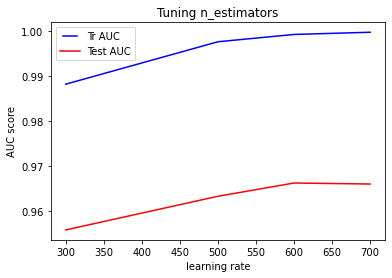

In [70]:
line1, = plt.plot(n_estimators, train_auc, "b", label="Tr AUC")
line2, = plt.plot(n_estimators, test_auc, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title("Tuning n_estimators")
plt.ylabel("AUC score")
plt.xlabel("learning rate")
plt.show()

In [ ]:
#Optimum n_estimators value is 600

In [71]:
#Tuning n_estimators parameter
subsample = [0.5,0.75,0.8,0.85,0.9]
train_auc, test_auc = [],[]
for i in subsample:
    model_xB = GradientBoostingClassifier(learning_rate =0.74 ,n_estimators = 600, subsample = i, loss = "log_loss")
    model_xB.fit(X_train,Y_train)
    pred_train = model_xB.predict(X_train)
    pred_test = model_xB.predict(X_test)
    false_positive_rate, true_positive_rate, threshold = roc_curve(Y_train,pred_train)
    false_positive_rate_tst, true_positive_rate_tst, threshold_tst = roc_curve(Y_test, pred_test)
    auc_train = auc(false_positive_rate, true_positive_rate)
    auc_test = auc(false_positive_rate_tst, true_positive_rate_tst)
    train_auc.append(auc_train)
    test_auc.append(auc_test)


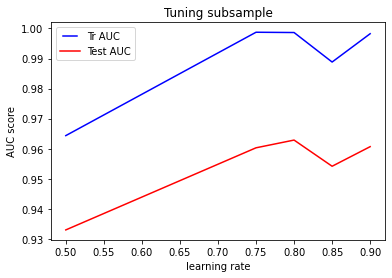

In [72]:
line1, = plt.plot(subsample, train_auc, "b", label="Tr AUC")
line2, = plt.plot(subsample, test_auc, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title("Tuning subsample")
plt.ylabel("AUC score")
plt.xlabel("learning rate")
plt.show()

In [ ]:
#Optimal subsample value is 0.8

In [73]:
final_xG = GradientBoostingClassifier(learning_rate =0.74 ,n_estimators = 600, subsample = 0.8, loss = "log_loss")
final_xG.fit(X_train,Y_train)
pred_xB = final_xG.predict(X_train)
pred_xB_tst = final_xG.predict(X_test)
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_train,pred_xB)
false_positive_rate_tst, true_positive_rate_tst, threshold_tst = roc_curve(Y_test, pred_xB_tst)
auc_train = auc(false_positive_rate, true_positive_rate)
auc_test = auc(false_positive_rate_tst, true_positive_rate_tst)

In [74]:
print("Area under Curve value for the Tr data using XGBoost Classifier : ", auc_train)
print("Area under Curve value for the Test data using XGBoost Classifier : ", auc_test)

Area under Curve value for the Tr data using XGBoost Classifier :  0.9958027330567669
Area under Curve value for the Test data using XGBoost Classifier :  0.9595463055526233
